In [ ]:
# Instalando as bibliotecas e atualizando 
!pip install pyDOE
!pip install -U seaborn
# Import MEF 1D Algorithm
!pip install -i https://test.pypi.org/simple/ FINITO-FEM-TOOLBOX

In [1]:
from FINITO_FEM_TOOLBOX import MEF1D
from RASD_TOOLBOX import *
import numpy as np

In [2]:
PX = ['NORMAL', 500, 100]
PY = ['NORMAL', 1000, 100]
PZ = ['NORMAL', 3, 0.3]

SETUP = {'REPETITIONS': 1,
        'TOTAL SAMPLING': 10000,
        'TOTAL G FUNCTIONS': 1,
        'TOTAL DESIGN VARIABLES': 3,
        'VARS': [PX, PY, PZ],
        'MODEL': 'MCS'}

In [3]:
def OBJ(X):
    P_X = X[0]
    P_Y = X[1]
    P_Z = X[2]
    
    D_0 = 3
    L = 100
    E = 30 * 10 ** 6
    W = 2
    T = 4

    # STATE LIMIT FUNCTION
    
    R_0 = P_Z
    S_0 = (4 * L ** 3 / (E * W * T)) * (((P_Y / T ** 2) ** 2  + (P_X / W ** 2) ** 2) ** 0.5)
    G_0 = R_0 - S_0

    R = [R_0] 
    S = [S_0] 
    G = [G_0]


    return R, S, G

In [4]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [ ]:
RESULTS_TEST['TOTAL RESULTS']['I'][(RESULTS_TEST['TOTAL RESULTS']['I']==1)]

In [ ]:
PLOT_SETUP = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS LABEL': '$x_0$ - $P_X$ $lb$',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
DATASET = RESULTS_TEST['TOTAL RESULTS']['X_0']      
# CALL PLOT
RASD_PLOT_1(DATASET, PLOT_SETUP)

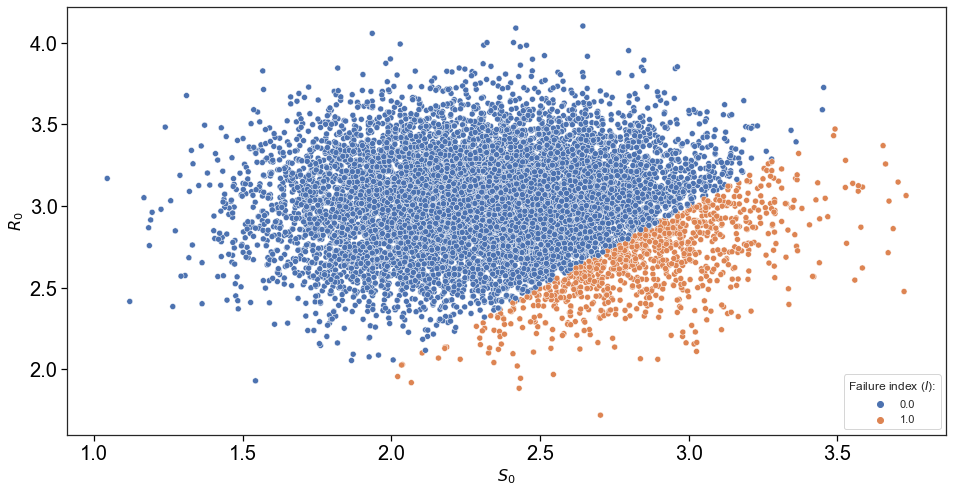

In [9]:
PLOT_SETUP = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.40, 
                'HEIGHT': 0.20,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Failure index ($I$):'}
# RESULTS
DATASET = RESULTS_TEST['TOTAL RESULTS']    
# CALL PLOT
RASD_PLOT_2(DATASET, PLOT_SETUP)

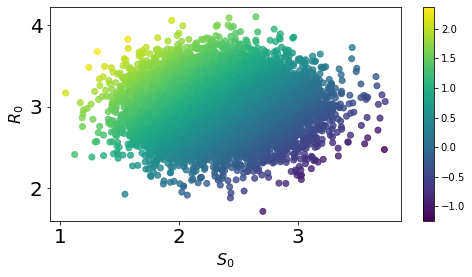

In [8]:
PLOT_SETUP = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'C VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}
# RESULTS
DATASET = RESULTS_TEST['TOTAL RESULTS'] 
# CALL PLOT
RASD_PLOT_3(DATASET, PLOT_SETUP)

(array([  1.,   1.,   5.,   3.,   6.,   9.,  10.,  35.,  39.,  56.,  81.,
        100., 159., 220., 270., 289., 352., 391., 414., 440., 498., 558.,
        480., 589., 605., 527., 536., 521., 419., 412., 353., 269., 275.,
        260., 174., 163., 123., 106.,  74.,  54.,  38.,  31.,  14.,  10.,
          9.,   3.,   5.,   5.,   4.,   4.]),
 array([1.04395771, 1.09770757, 1.15145743, 1.20520729, 1.25895715,
        1.31270701, 1.36645688, 1.42020674, 1.4739566 , 1.52770646,
        1.58145632, 1.63520618, 1.68895604, 1.7427059 , 1.79645576,
        1.85020562, 1.90395548, 1.95770535, 2.01145521, 2.06520507,
        2.11895493, 2.17270479, 2.22645465, 2.28020451, 2.33395437,
        2.38770423, 2.44145409, 2.49520396, 2.54895382, 2.60270368,
        2.65645354, 2.7102034 , 2.76395326, 2.81770312, 2.87145298,
        2.92520284, 2.9789527 , 3.03270257, 3.08645243, 3.14020229,
        3.19395215, 3.24770201, 3.30145187, 3.35520173, 3.40895159,
        3.46270145, 3.51645131, 3.57020117, 3.

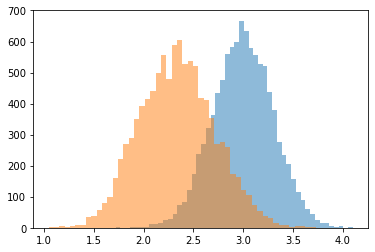

In [7]:
plt.hist(RESULTS_TEST['TOTAL RESULTS']['R_0'], bins=50, label='a', alpha=0.5)
plt.hist(RESULTS_TEST['TOTAL RESULTS']['S_0'], bins=50, label='b', alpha=0.5)


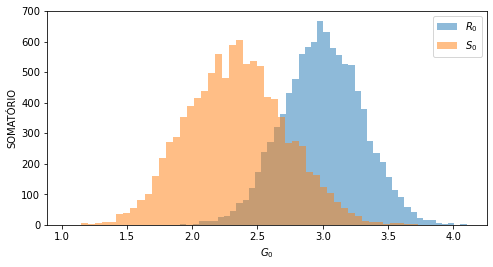

In [6]:
PLOT_SETUP = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$G_0$',
                    'Y AXIS LABEL': 'SOMATÓRIO',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
DATASET = RESULTS_TEST['TOTAL RESULTS'] 
# CALL PLOT
RASD_PLOT_4(DATASET, PLOT_SETUP)